In [1]:
#pip install -q numpy pandas plotly matplotlib seaborn 
#import + seed 
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

np.random.seed(42)
sns.set(style = "whitegrid")
os.makedirs('artifacts', exist_ok = True)


In [2]:
#Data Loading (guarded required validation points
possible_paths = [
    'data/flights.csv',
    'data/flights_dataset.csv',
    '/contents/Drive/Mydrive/flights.csv'
]
df = None 
for p in possible_paths:
    if os.path.exists(p):
        try:
            df = pd.read_csv(p,low_memory =False)
            print(f"Loaded dataset from {p}")
            break
        except Exception as e:
            print(f"Found file {p}  but failed to read: {e}")

if df is None:
    print("No local flights dataset found. please place a csv at data/flights_dataset_csv or mount Drive.")
    df = pd.DataFrame()

#Required: Validation prints for dataset verification 
print("df.shape->", df.shape)
print("df.columns->", df.columns.tolist())
display(df.sample(5) if len(df) else "No data to sample")

Loaded dataset from data/flights_dataset.csv
df.shape-> (171666, 21)
df.columns-> ['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
4739,2023,5,9E,Endeavor Air Inc.,MYR,"Myrtle Beach, SC: Myrtle Beach International",63.0,6.0,2.39,0.00,...,0.0,3.00,0.0,0.0,255.0,118.0,0.0,22.0,0.0,115.0
146047,2015,5,OO,SkyWest Airlines Inc.,ACV,"Arcata/Eureka, CA: California Redwood Coast Hu...",98.0,33.0,3.93,0.00,...,0.0,27.25,1.0,0.0,1658.0,236.0,0.0,61.0,0.0,1361.0
25700,2022,5,WN,Southwest Airlines Co.,MEM,"Memphis, TN: Memphis International",217.0,68.0,38.21,2.28,...,0.0,21.95,0.0,0.0,3469.0,1824.0,122.0,275.0,0.0,1248.0
123710,2017,2,VX,Virgin America,DCA,"Washington, DC: Ronald Reagan Washington National",104.0,14.0,6.45,2.32,...,0.0,4.73,0.0,0.0,637.0,353.0,85.0,23.0,0.0,176.0
39508,2021,9,YV,Mesa Airlines Inc.,RSW,"Fort Myers, FL: Southwest Florida International",47.0,2.0,0.00,0.00,...,0.0,2.00,0.0,0.0,53.0,0.0,0.0,0.0,0.0,53.0


In [3]:
df.shape

(171666, 21)

In [4]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


In [5]:
df.tail()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
171661,2013,8,YV,Mesa Airlines Inc.,TRI,"Bristol/Johnson City/Kingsport, TN: Tri Cities",7.0,1.0,0.78,0.0,...,0.0,0.0,0.0,0.0,23.0,18.0,0.0,5.0,0.0,0.0
171662,2013,8,YV,Mesa Airlines Inc.,YUM,"Yuma, AZ: Yuma MCAS/Yuma International",2.0,1.0,0.00,0.0,...,0.0,1.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,17.0
171663,2013,8,YV,Mesa Airlines Inc.,SLC,"Salt Lake City, UT: Salt Lake City International",2.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171664,2013,8,DL,Delta Air Lines Inc.,SBN,"South Bend, IN: South Bend International",1.0,1.0,1.00,0.0,...,0.0,0.0,0.0,0.0,18.0,18.0,0.0,0.0,0.0,0.0
171665,2013,8,F9,Frontier Airlines Inc.,MTJ,"Montrose/Delta, CO: Montrose Regional",1.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.sample(5)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
13087,2022,12,HA,Hawaiian Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",13.0,2.0,2.00,0.0,...,0.00,0.00,0.0,0.0,57.0,57.0,0.0,0.0,0.0,0.0
13250,2022,12,NK,Spirit Air Lines,CLT,"Charlotte, NC: Charlotte Douglas International",209.0,66.0,23.54,2.0,...,0.91,18.84,7.0,0.0,5460.0,2423.0,163.0,1449.0,56.0,1369.0
34458,2021,11,9E,Endeavor Air Inc.,EWR,"Newark, NJ: Newark Liberty International",146.0,20.0,5.18,0.0,...,0.00,1.61,1.0,1.0,924.0,292.0,0.0,527.0,0.0,105.0
116631,2017,9,OO,SkyWest Airlines Inc.,SGF,"Springfield, MO: Springfield-Branson National",82.0,9.0,3.29,0.0,...,0.00,1.72,0.0,0.0,382.0,191.0,0.0,93.0,0.0,98.0
77465,2019,9,AS,Alaska Airlines Inc.,CHS,"Charleston, SC: Charleston AFB/International",26.0,4.0,0.84,0.0,...,0.00,0.00,2.0,0.0,136.0,43.0,0.0,93.0,0.0,0.0


In [7]:
df.dropna().sum()

year                                                           345622142
month                                                            1112142
carrier                9E9E9E9E9E9E9E9E9E9E9E9E9E9E9E9E9E9E9E9E9E9E9E...
carrier_name           Endeavor Air Inc.Endeavor Air Inc.Endeavor Air...
airport                ABEABYAEXAGSALBATLAUSAVLAZOBDLBGMBGRBHMBNABQKB...
airport_name           Allentown/Bethlehem/Easton, PA: Lehigh Valley ...
arr_flights                                                   62144776.0
arr_del15                                                     11375095.0
carrier_ct                                                    3565080.59
weather_ct                                                     385767.94
nas_ct                                                        3322432.52
security_ct                                                     26930.39
late_aircraft_ct                                               4074891.0
arr_cancelled                                      

In [8]:
# Basic schema normalization & parsing (guarded)
if df.shape[0] > 0:
    # Common BTS column names include: Year, Month, DayofMonth, FlightDate, CRSDepTime, DepTime,
    # DepDelay, CRSArrTime, ArrTime, ArrDelay, Cancelled, CancellationCode, UniqueCarrier, Origin, Dest
    # Trim whitespace for object/string columns
    for c in df.select_dtypes(include='object').columns:
        df[c] = df[c].astype(str).str.strip()
    
    # Ensure numeric delay columns are numeric
    for c in ['DepDelay','ArrDelay','DepDelayMinutes','ArrDelayMinutes','Cancelled']:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors='coerce')
    
    # Parse FlightDate if available; fallback: construct from Year/Month/DayofMonth
    if 'FlightDate' in df.columns:
        df['FlightDate'] = pd.to_datetime(df['FlightDate'], errors='coerce')
    elif {'Year','Month','DayofMonth'}.issubset(df.columns):
        df['FlightDate'] = pd.to_datetime(df[['Year','Month','DayofMonth']].assign(hour=0), errors='coerce')
    
    # Create canonical delay minutes columns
    if 'DepDelay' in df.columns:
        df['dep_delay_min'] = df['DepDelay']
    elif 'DepDelayMinutes' in df.columns:
        df['dep_delay_min'] = df['DepDelayMinutes']
    
    if 'ArrDelay' in df.columns:
        df['arr_delay_min'] = df['ArrDelay']
    elif 'ArrDelayMinutes' in df.columns:
        df['arr_delay_min'] = df['ArrDelayMinutes']
    
    # Normalize Cancelled to boolean
    if 'Cancelled' in df.columns:
        df['is_cancelled'] = df['Cancelled'].fillna(0).astype(int).astype(bool)
    
    print("Post-normalization columns present:", [c for c in ['FlightDate','dep_delay_min','arr_delay_min','is_cancelled','UniqueCarrier','Origin','Dest'] if c in df.columns])
else:
    print("No data loaded — skipping cleaning steps.")


Post-normalization columns present: []


In [9]:
df.shape
df.head()


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


In [10]:
print(df.columns.tolist())

['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']


In [11]:
#data cleaning
if df.shape[0] > 0:
    # Trim strings
    for c in df.select_dtypes(include='object').columns:
        df[c] = df[c].astype(str).str.strip()

    # Make numeric columns numeric
    num_cols = ['arr_delay','arr_flights','arr_del15','carrier_ct','weather_ct',
                'nas_ct','security_ct','late_aircraft_ct',
                'arr_cancelled','arr_diverted','carrier_delay','weather_delay',
                'nas_delay','security_delay','late_aircraft_delay']
    
    for c in num_cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors='coerce')

    # Build a monthly date from year + month
    if {'year','month'}.issubset(df.columns):
        df['FlightDate'] = pd.to_datetime(df[['year','month']].assign(day=1), errors='coerce')

    # Map arrival delay minutes
    if 'arr_delay' in df.columns:
        df['arr_delay_min'] = df['arr_delay']

    # Map cancellation count (not boolean)
    if 'arr_cancelled' in df.columns:
        df['cancel_count'] = df['arr_cancelled']

    # Rename carrier + airport for consistency
    df = df.rename(columns={
        'carrier': 'UniqueCarrier',
        'airport': 'Origin'
    })

    print("Post-normalization columns present:", 
          [c for c in ['FlightDate','arr_delay_min','cancel_count','UniqueCarrier','Origin'] if c in df.columns])

else:
    print("No data loaded — skipping cleaning steps.")


Post-normalization columns present: ['FlightDate', 'arr_delay_min', 'cancel_count', 'UniqueCarrier', 'Origin']


In [13]:
#univariate Delay and cancellation distribution guareded
if df.shape[0]>0 and 'dep_delayy_min' in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df['dep_delay_min'].dropna().clip(-6,600), bins-100)
    plt.title('Departure delay in minutes (clipped)')
    plt.xlabel('Delay minutes')
    plt.savefig('artifacts/dep_delay_distribution.png', dpi = 150, bbox_inches = 'tight')
    plt.show()
else:
    print("dep_delay_min missing - skip delay distribution")

#cancellation rate 
if df.shape[0]>0 and 'is_cancelled' in df.columns:
    cancel_rate = df['iscancelled'].mean()
    print(f"Overall cncellation rate:{cancel_rate : .3%}")
    

dep_delay_min missing - skip delay distribution


In [16]:
df.head()

,year,month,UniqueCarrier,carrier_name,Origin,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,FlightDate,arr_delay_min,cancel_count,cancel_rate
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,1375.0,71.0,761.0,118.0,0.0,425.0,2023-08-01,1375.0,2.0,0.022472
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,799.0,218.0,1.0,62.0,0.0,518.0,2023-08-01,799.0,0.0,0.000000
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,766.0,56.0,188.0,78.0,0.0,444.0,2023-08-01,766.0,1.0,0.016129
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,1397.0,471.0,320.0,388.0,0.0,218.0,2023-08-01,1397.0,1.0,0.015152
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,1530.0,628.0,0.0,134.0,0.0,768.0,2023-08-01,1530.0,2.0,0.021739


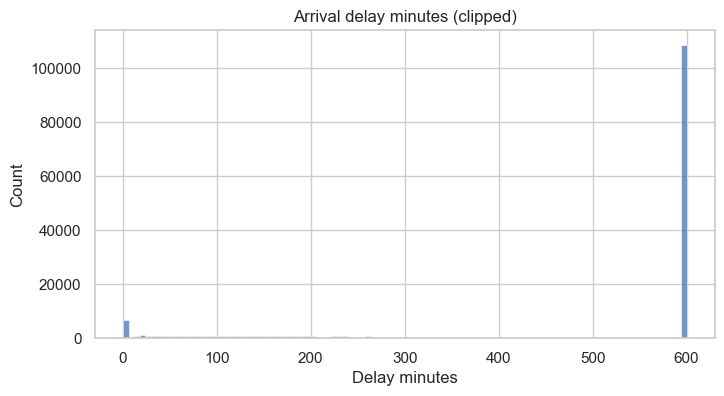

Overall cancellation rate: 0.024822047610815228


In [15]:
# Univariate: Arrival delay distribution
if df.shape[0] > 0 and 'arr_delay' in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df['arr_delay'].dropna().clip(-60,600), bins=100)
    plt.title('Arrival delay minutes (clipped)')
    plt.xlabel('Delay minutes')
    plt.savefig('artifacts/arr_delay_distribution.png', dpi=150, bbox_inches='tight')
    plt.show()
else:
    print("arr_delay missing — skip delay distribution.")

if 'arr_cancelled' in df.columns and 'arr_flights' in df.columns:
    df['cancel_rate'] = df['arr_cancelled'] / df['arr_flights']
    print("Overall cancellation rate:", df['cancel_rate'].mean())


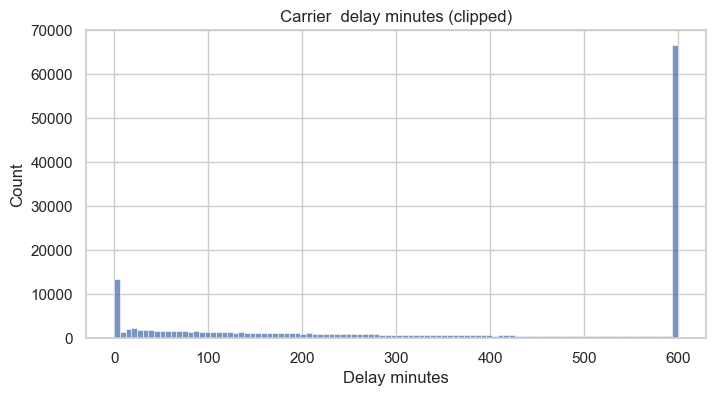

Average carrier disruption rate: 6.741%


In [25]:
# Univariate: Carrier delay distribution
if df.shape[0] > 0 and 'carrier_delay' in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df['carrier_delay'].dropna().clip(-60,600), bins=100)
    plt.title('Carrier  delay minutes (clipped)')
    plt.xlabel('Delay minutes')
    plt.savefig('artifacts/carrier_delay_distribution.png', dpi=150, bbox_inches='tight')
    plt.show()
else:
    print("carrier_delay missing — skip delay distribution.")

if 'carrier_ct' in df.columns and 'arr_flights' in df.columns:
    df['carrier_disruption_rate'] = df['carrier_ct'] / df['arr_flights']
    print(f"Average carrier disruption rate: {df['carrier_disruption_rate'].mean():.3%}")
else:
    print("Carrier delay columns missing — skip carrier disruption rate.")



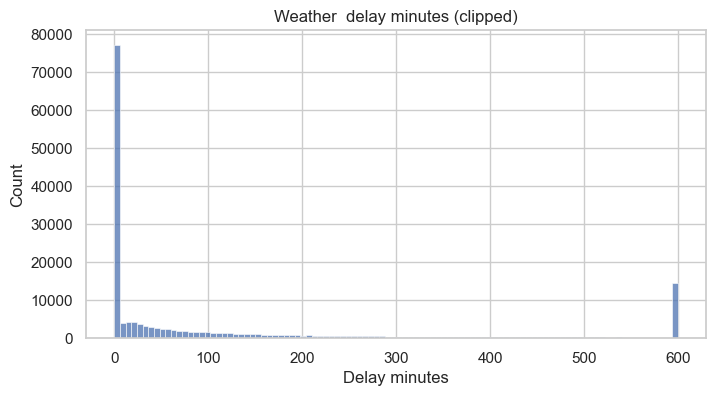

Average weather disruption rate: 0.796%


In [26]:
# Univariate: Carrier delay distribution
if df.shape[0] > 0 and 'weather_delay' in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df['weather_delay'].dropna().clip(-60,600), bins=100)
    plt.title('Weather  delay minutes (clipped)')
    plt.xlabel('Delay minutes')
    plt.savefig('artifacts/weather_delay_distribution.png', dpi=150, bbox_inches='tight')
    plt.show()
else:
    print("weather_delay missing — skip delay distribution.")

# Weather disruption ratio 
if 'weather_ct' in df.columns and 'arr_flights' in df.columns:
    df['weather_disruption_rate'] = df['weather_ct'] / df['arr_flights']
    print(f"Average weather disruption rate: {df['weather_disruption_rate'].mean():.3%}")
else:
    print("Weather disruption columns missing — skip.")


In [30]:
print(df.columns.tolist())

['year', 'month', 'UniqueCarrier', 'carrier_name', 'Origin', 'airport_name', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'FlightDate', 'arr_delay_min', 'cancel_count', 'cancel_rate', 'weather_disruption_rate', 'carrier_disruption_rate']


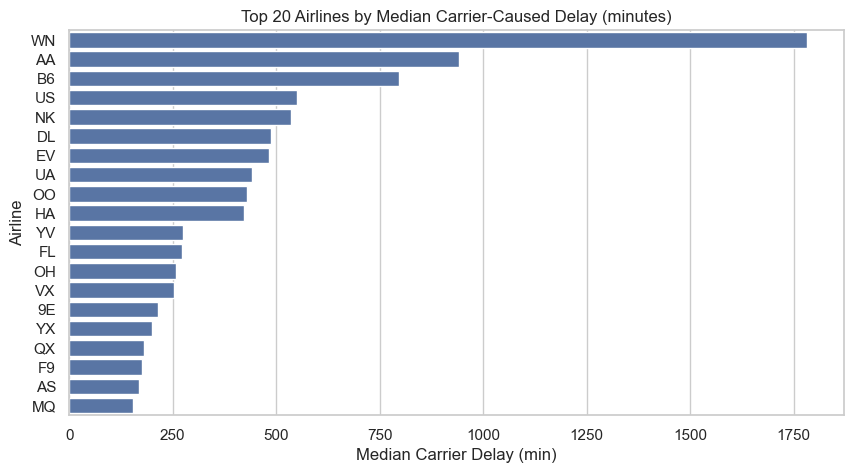

In [31]:
# Median carrier-caused delay by airline
if df.shape[0] > 0 and 'UniqueCarrier' in df.columns and 'carrier_delay' in df.columns:
    med_by_carrier = (
        df.groupby('UniqueCarrier')['carrier_delay']
        .median()
        .sort_values(ascending=False)
        .head(20)
    )

    plt.figure(figsize=(10,5))
    sns.barplot(x=med_by_carrier.values, y=med_by_carrier.index)
    plt.title('Top 20 Airlines by Median Carrier-Caused Delay (minutes)')
    plt.xlabel('Median Carrier Delay (min)')
    plt.ylabel('Airline')
    plt.savefig('artifacts/median_carrier_delay_by_airline.png', dpi=150, bbox_inches='tight')
    plt.show()
else:
    print("UniqueCarrier or carrier_delay missing — skip ranking.")

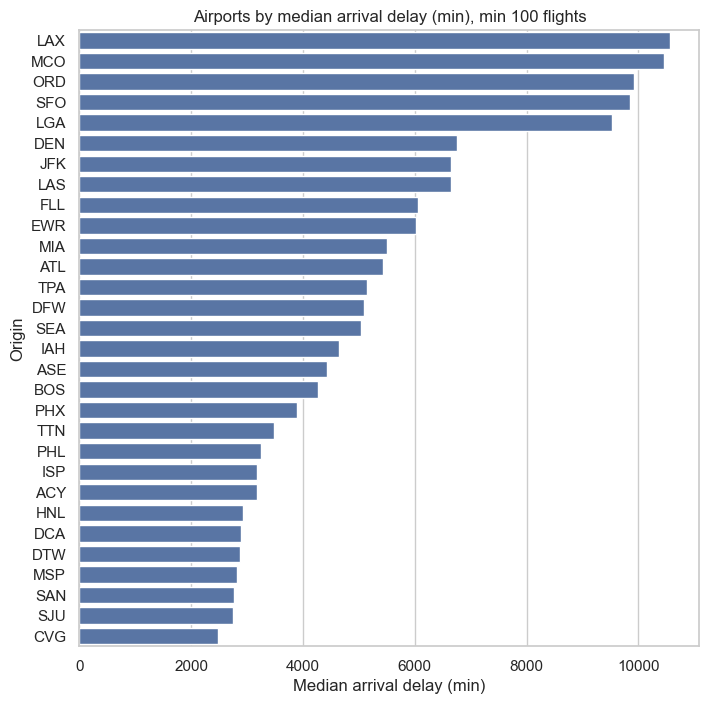

In [33]:
# Airport-level: median ARRIVAL delay by origin (valid for this dataset)
if df.shape[0] > 0 and 'Origin' in df.columns and 'arr_delay_min' in df.columns:
    med_by_origin = (
        df.groupby('Origin')['arr_delay_min']
        .agg(['median', 'count'])
        .query('count > 100')
        .sort_values('median', ascending=False)
        .head(30)
    )
    
    plt.figure(figsize=(8,8))
    sns.barplot(x=med_by_origin['median'], y=med_by_origin.index)
    plt.xlabel('Median arrival delay (min)')
    plt.title('Airports by median arrival delay (min), min 100 flights')
    plt.savefig('artifacts/median_delay_by_origin.png', dpi=150, bbox_inches='tight')
    plt.show()
else:
    print("Origin or arr_delay_min missing — skip airport ranking.")

In [34]:
# Time-series: monthly percent on-time trend (guarded)
if df.shape[0] > 0 and 'FlightDate' in df.columns and 'dep_delay_min' in df.columns:
    df['month'] = df['FlightDate'].dt.to_period('M')
    summary = df.groupby('month').apply(lambda x: pd.Series({
        'median_dep_delay': x['dep_delay_min'].median(skipna=True),
        'pct_on_time': (x['dep_delay_min']<=15).mean()
    }))
    summary.index = summary.index.to_timestamp()
    plt.figure(figsize=(10,4))
    plt.plot(summary.index, summary['pct_on_time'])
    plt.title('Monthly % on-time (dep delay <= 15 min)')
    plt.ylabel('Percent on-time')
    plt.xlabel('Month')
    plt.savefig('artifacts/monthly_pct_on_time.png', dpi=150, bbox_inches='tight')
    plt.show()
else:
    print("FlightDate or dep_delay_min missing — skip monthly trend.")


FlightDate or dep_delay_min missing — skip monthly trend.


C:\Users\athar\AppData\Local\Temp\ipykernel_10692\1078613104.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = df.groupby('month').apply(


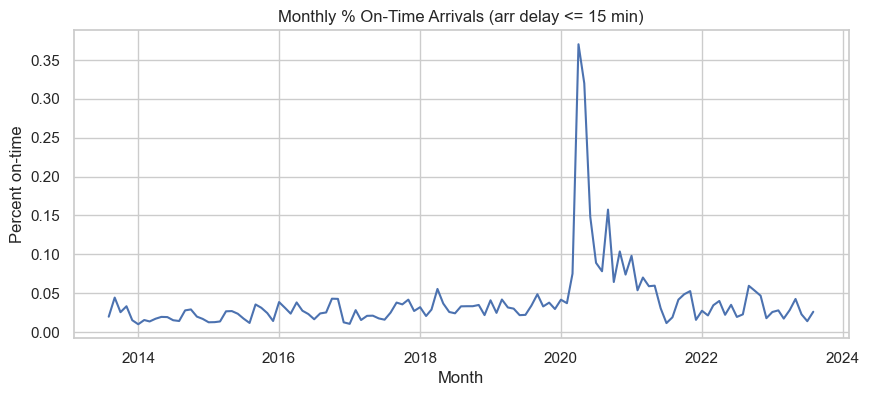

In [35]:
# Time-series: monthly percent on-time arrivals (arrival delay <= 15 min)
if df.shape[0] > 0 and 'FlightDate' in df.columns and 'arr_delay_min' in df.columns:

    df['month'] = df['FlightDate'].dt.to_period('M')

    summary = df.groupby('month').apply(
        lambda x: pd.Series({
            'median_arr_delay': x['arr_delay_min'].median(skipna=True),
            'pct_on_time': (x['arr_delay_min'] <= 15).mean()
        })
    )

    summary.index = summary.index.to_timestamp()

    plt.figure(figsize=(10,4))
    plt.plot(summary.index, summary['pct_on_time'])
    plt.title('Monthly % On-Time Arrivals (arr delay <= 15 min)')
    plt.ylabel('Percent on-time')
    plt.xlabel('Month')
    plt.savefig('artifacts/monthly_pct_on_time.png', dpi=150, bbox_inches='tight')
    plt.show()

else:
    print("FlightDate or arr_delay_min missing — skip monthly trend.")


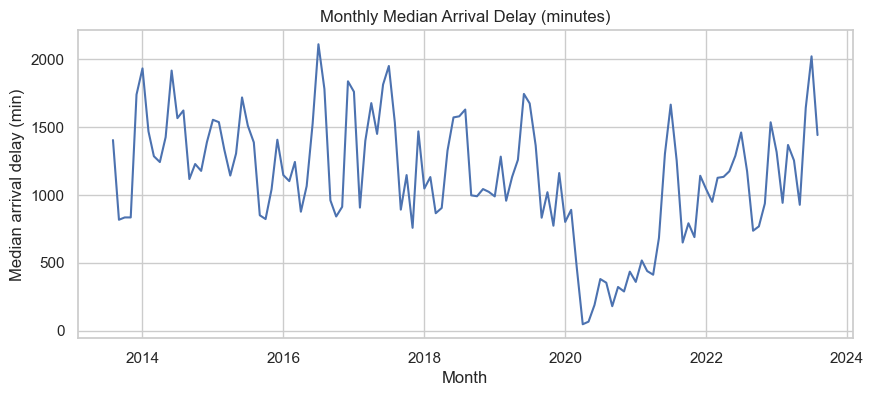

In [36]:
# Time-series 1: Monthly median arrival delay
if df.shape[0] > 0 and 'FlightDate' in df.columns and 'arr_delay_min' in df.columns:

    df['month'] = df['FlightDate'].dt.to_period('M')

    summary = (
        df.groupby('month')['arr_delay_min']
        .median()
        .to_timestamp()
    )

    plt.figure(figsize=(10,4))
    plt.plot(summary.index, summary.values)
    plt.title('Monthly Median Arrival Delay (minutes)')
    plt.ylabel('Median arrival delay (min)')
    plt.xlabel('Month')
    plt.savefig('artifacts/monthly_median_arrival_delay.png', dpi=150, bbox_inches='tight')
    plt.show()

else:
    print("FlightDate or arr_delay_min missing — skip median arrival delay trend.")


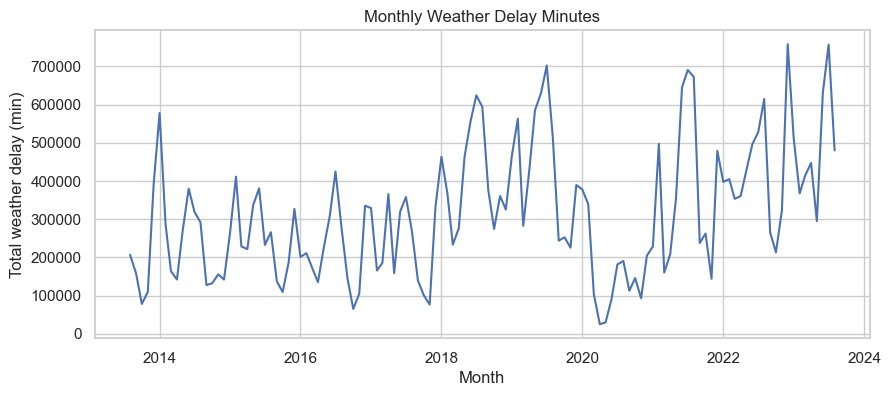

In [37]:
# Time-series 2: Monthly total weather delay minutes
if df.shape[0] > 0 and 'FlightDate' in df.columns and 'weather_delay' in df.columns:

    df['month'] = df['FlightDate'].dt.to_period('M')

    summary = (
        df.groupby('month')['weather_delay']
        .sum()
        .to_timestamp()
    )

    plt.figure(figsize=(10,4))
    plt.plot(summary.index, summary.values)
    plt.title('Monthly Weather Delay Minutes')
    plt.ylabel('Total weather delay (min)')
    plt.xlabel('Month')
    plt.savefig('artifacts/monthly_weather_delay_trend.png', dpi=150, bbox_inches='tight')
    plt.show()

else:
    print("FlightDate or weather_delay missing — skip weather delay trend.")


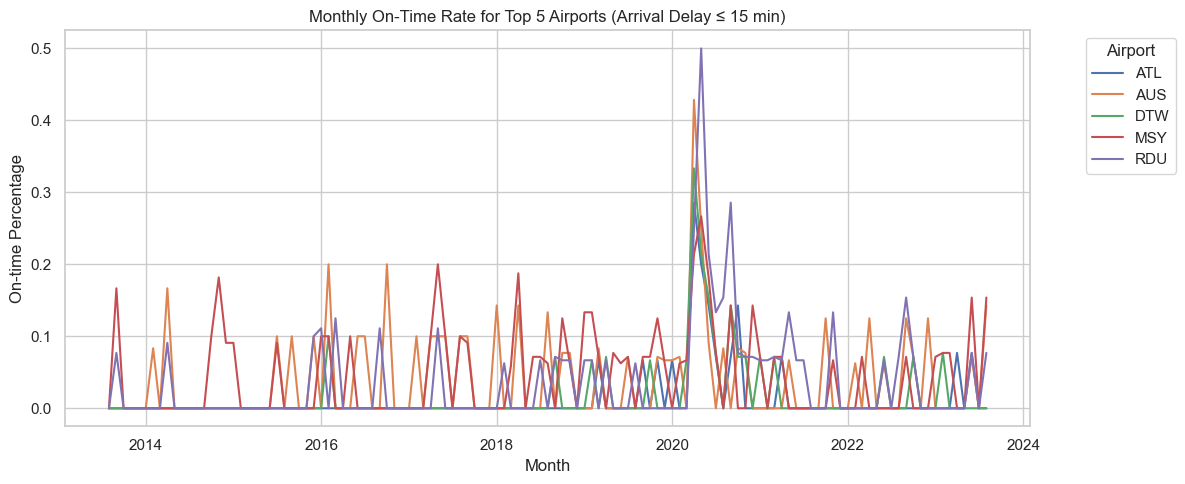

In [44]:
# 1. Top Airports Monthly On-Time Trend
if df.shape[0] > 0 and {'FlightDate', 'Origin', 'arr_delay_min'}.issubset(df.columns):

    df['month'] = df['FlightDate'].dt.to_period('M')

    # Compute total flights by airport
    airport_counts = df.groupby('Origin')['arr_delay_min'].count().sort_values(ascending=False)

    # Pick top 5 busiest airports
    top_airports = airport_counts.head(5).index.tolist()

    df_top = df[df['Origin'].isin(top_airports)]

    summary = (
        (df_top['arr_delay_min'] <= 15)
        .groupby([df_top['month'], df_top['Origin']])
        .mean()
        .unstack()
        .to_timestamp()
    )

    plt.figure(figsize=(12,5))
    for airport in summary.columns:
        plt.plot(summary.index, summary[airport], label=airport)

    plt.title('Monthly On-Time Rate for Top 5 Airports (Arrival Delay ≤ 15 min)')
    plt.ylabel('On-time Percentage')
    plt.xlabel('Month')
    plt.legend(title="Airport", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig('artifacts/monthly_on_time_top_airports.png', dpi=150)
    plt.show()

else:
    print("Required columns missing — skipping top airports monthly trend.")


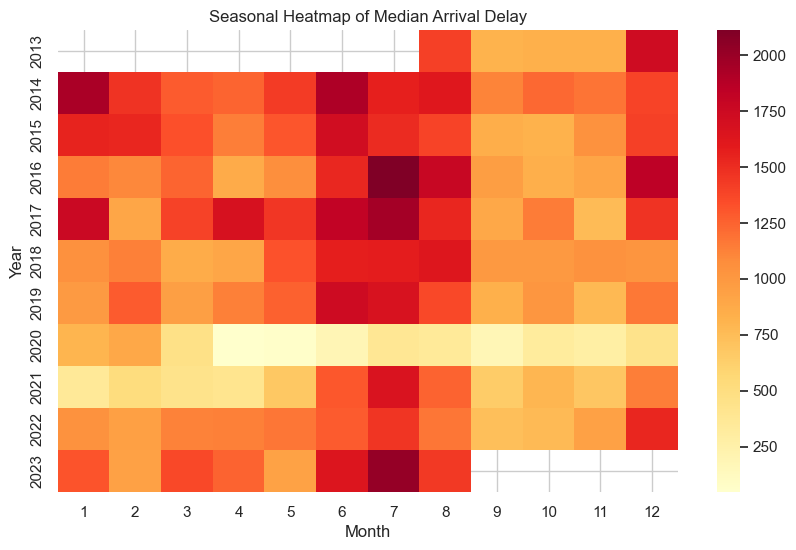

In [45]:
# 2. Seasonal Patterns Heatmap
if df.shape[0] > 0 and {'FlightDate', 'arr_delay_min'}.issubset(df.columns):

    df['year'] = df['FlightDate'].dt.year
    df['month_num'] = df['FlightDate'].dt.month

    # Pivot: median arrival delay by year × month
    seasonal = (
        df.pivot_table(values='arr_delay_min',
                       index='year',
                       columns='month_num',
                       aggfunc='median')
        .sort_index()
    )

    plt.figure(figsize=(10,6))
    sns.heatmap(seasonal, annot=False, cmap='YlOrRd')
    plt.title('Seasonal Heatmap of Median Arrival Delay')
    plt.xlabel('Month')
    plt.ylabel('Year')
    plt.savefig('artifacts/seasonal_delay_heatmap.png', dpi=150, bbox_inches='tight')
    plt.show()

else:
    print("Required columns missing — skipping seasonal heatmap.")


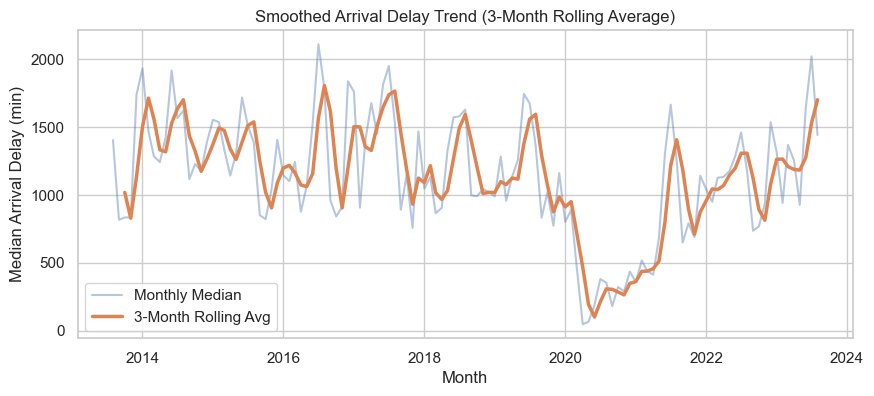

In [46]:
# 3. Rolling-Average Delay Smoothing
if df.shape[0] > 0 and {'FlightDate', 'arr_delay_min'}.issubset(df.columns):

    df['month'] = df['FlightDate'].dt.to_period('M')

    monthly_med = (
        df.groupby('month')['arr_delay_min']
        .median()
        .to_timestamp()
        .sort_index()
    )

    # 3-month rolling average smoothing
    rolling = monthly_med.rolling(window=3, center=False).mean()

    plt.figure(figsize=(10,4))
    plt.plot(monthly_med.index, monthly_med.values, alpha=0.4, label="Monthly Median")
    plt.plot(rolling.index, rolling.values, linewidth=2.5, label="3-Month Rolling Avg")
    plt.title('Smoothed Arrival Delay Trend (3-Month Rolling Average)')
    plt.ylabel('Median Arrival Delay (min)')
    plt.xlabel('Month')
    plt.legend()
    plt.savefig('artifacts/rolling_avg_arrival_delay.png', dpi=150, bbox_inches='tight')
    plt.show()

else:
    print("Required columns missing — skipping rolling average delay plot.")


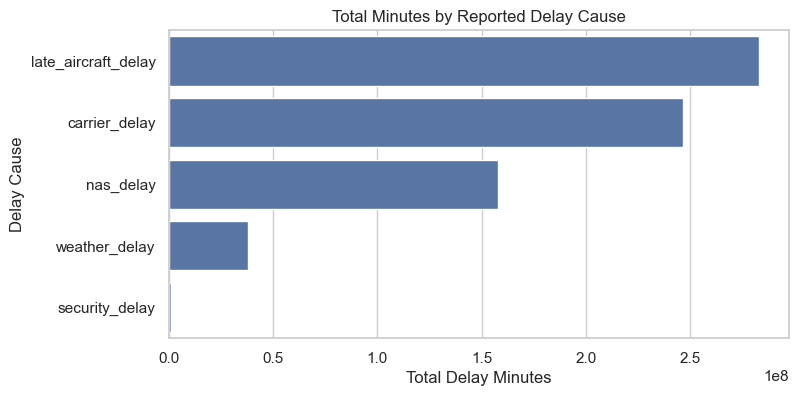

In [48]:
# Delay cause stack for your dataset
delay_causes = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

available_causes = [c for c in delay_causes if c in df.columns]

if df.shape[0] > 0 and available_causes:
    cause_sum = df[available_causes].sum().sort_values(ascending=False)

    plt.figure(figsize=(8,4))
    sns.barplot(x=cause_sum.values, y=cause_sum.index)
    plt.title('Total Minutes by Reported Delay Cause')
    plt.xlabel('Total Delay Minutes')
    plt.ylabel('Delay Cause')
    plt.savefig('artifacts/delay_cause_totals.png', dpi=150, bbox_inches='tight')
    plt.show()

else:
    print("No delay-cause columns present — skip delay cause analysis.")


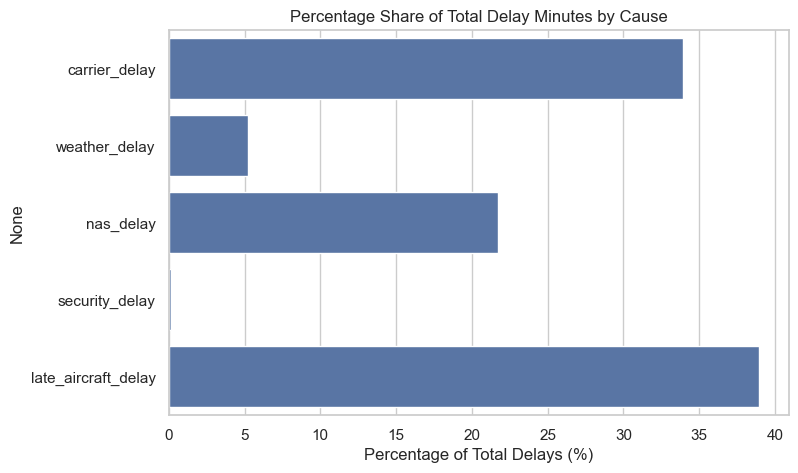

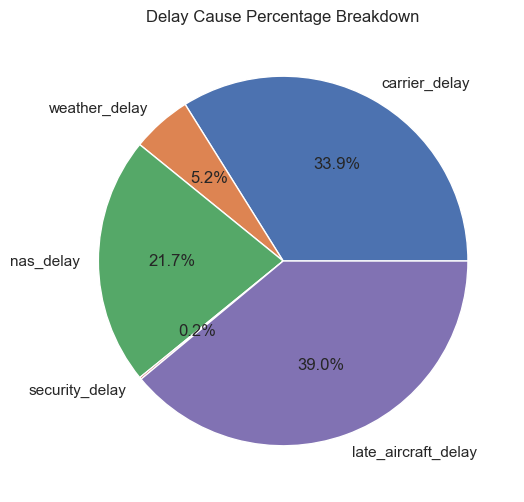

In [49]:
# Percentage share of each delay cause
delay_causes = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
available = [c for c in delay_causes if c in df.columns]

if df.shape[0] > 0 and available:
    totals = df[available].sum()
    pct = (totals / totals.sum()) * 100

    plt.figure(figsize=(8,5))
    sns.barplot(x=pct.values, y=pct.index)
    plt.title('Percentage Share of Total Delay Minutes by Cause')
    plt.xlabel('Percentage of Total Delays (%)')
    plt.savefig('artifacts/delay_cause_percentage_bar.png', dpi=150, bbox_inches='tight')
    plt.show()

    # Pie chart (optional)
    plt.figure(figsize=(6,6))
    plt.pie(pct.values, labels=pct.index, autopct='%1.1f%%')
    plt.title('Delay Cause Percentage Breakdown')
    plt.savefig('artifacts/delay_cause_percentage_pie.png', dpi=150, bbox_inches='tight')
    plt.show()

else:
    print("No delay-cause columns present — skipping percentage breakdown.")


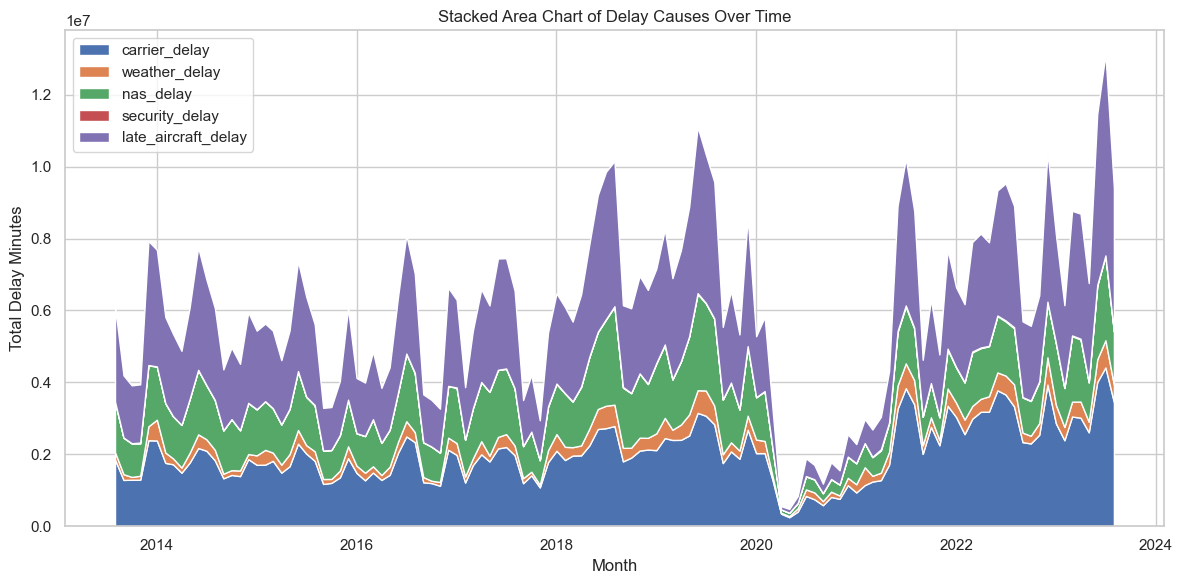

In [51]:
# Stacked Area Chart of Delay Causes over Time
cause_cols = ['carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']
available = [c for c in cause_cols if c in df.columns]

if df.shape[0] > 0 and 'FlightDate' in df.columns and available:

    df['month'] = df['FlightDate'].dt.to_period('M')

    monthly = (
        df.groupby('month')[available]
        .sum()
        .to_timestamp()
        .sort_index()
    )

    plt.figure(figsize=(12,6))
    plt.stackplot(monthly.index, monthly.T, labels=monthly.columns)
    plt.legend(loc='upper left')
    plt.title('Stacked Area Chart of Delay Causes Over Time')
    plt.ylabel('Total Delay Minutes')
    plt.xlabel('Month')
    plt.tight_layout()
    plt.savefig('artifacts/delay_cause_stacked_area.png', dpi=150)
    plt.show()

else:
    print("Required columns missing — skipping stacked area chart.")


<Figure size 1000x600 with 0 Axes>

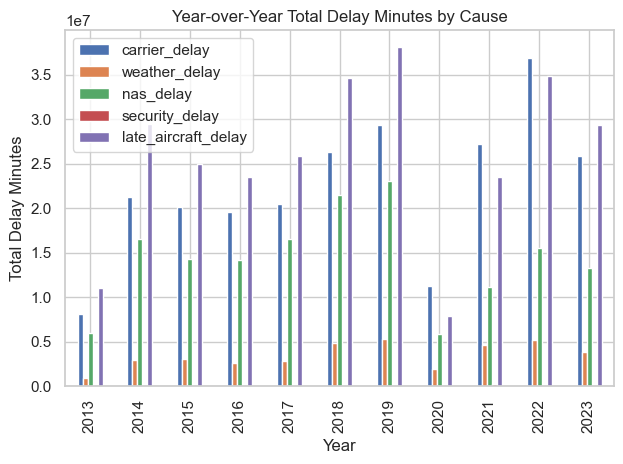

In [52]:
# Year-over-Year Comparison by Delay Cause
if df.shape[0] > 0 and 'FlightDate' in df.columns and available:

    df['year'] = df['FlightDate'].dt.year

    yearly = df.groupby('year')[available].sum()

    plt.figure(figsize=(10,6))
    yearly.plot(kind='bar')
    plt.title('Year-over-Year Total Delay Minutes by Cause')
    plt.ylabel('Total Delay Minutes')
    plt.xlabel('Year')
    plt.tight_layout()
    plt.savefig('artifacts/yoy_delay_cause.png', dpi=150)
    plt.show()

else:
    print("Required columns missing — skipping YoY chart.")


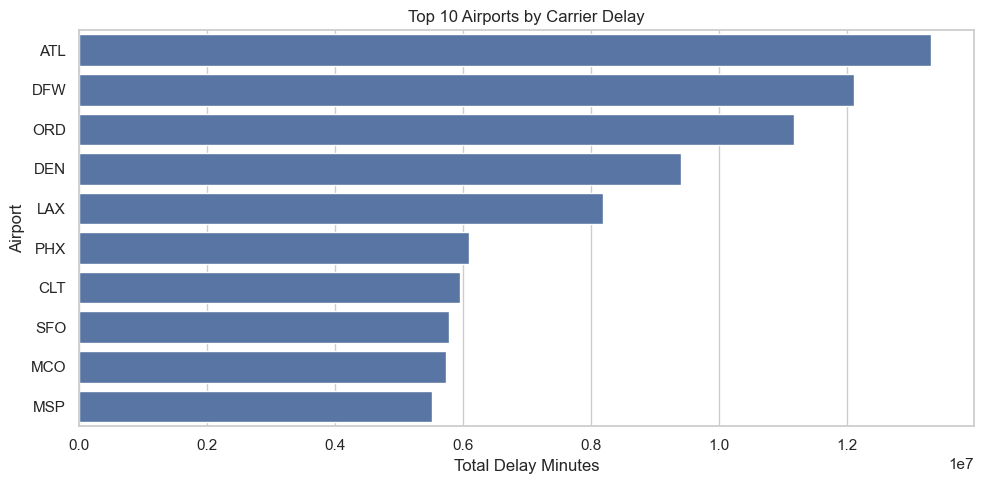

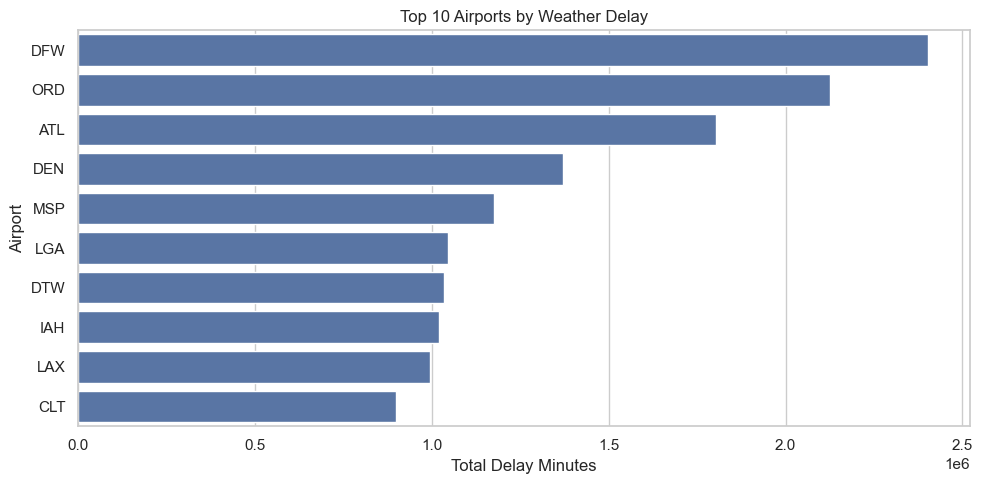

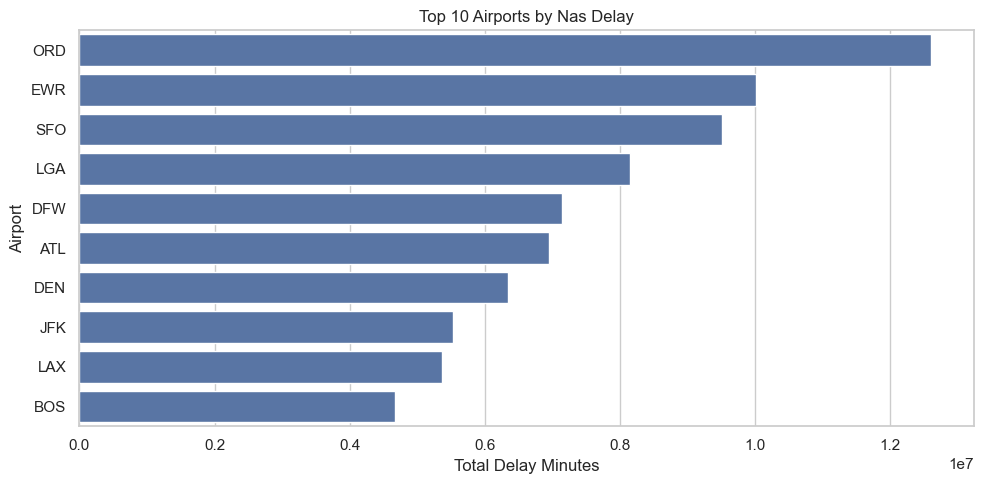

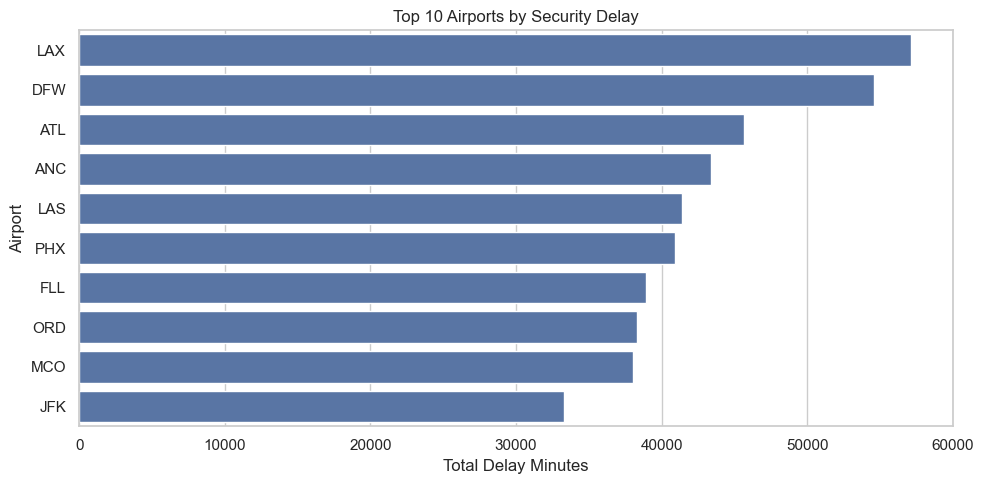

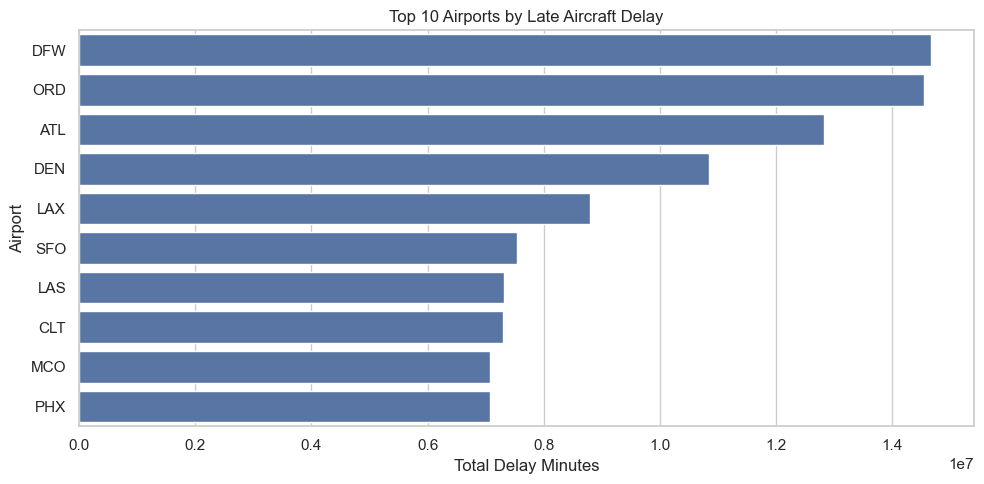

In [53]:
# Top Airports by Each Delay Type
if df.shape[0] > 0 and 'Origin' in df.columns and available:

    for cause in available:
        top_airports = (
            df.groupby('Origin')[cause]
            .sum()
            .sort_values(ascending=False)
            .head(10)
        )

        plt.figure(figsize=(10,5))
        sns.barplot(x=top_airports.values, y=top_airports.index)
        plt.title(f'Top 10 Airports by {cause.replace("_", " ").title()}')
        plt.xlabel('Total Delay Minutes')
        plt.ylabel('Airport')
        plt.tight_layout()
        plt.savefig(f'artifacts/top_airports_{cause}.png', dpi=150)
        plt.show()

else:
    print("Required columns missing — skipping top airports analysis.")


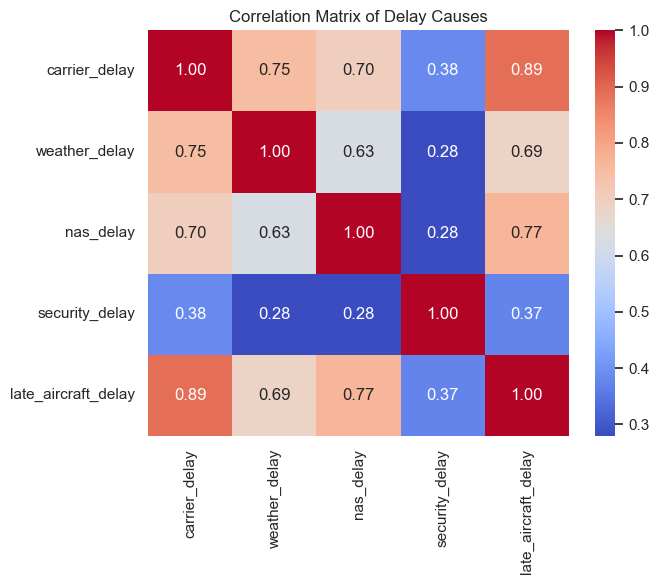

In [57]:
# Correlation Matrix Across Delay Causes
if df.shape[0] > 0 and available:

    corr = df[available].corr()

    plt.figure(figsize=(7,6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Delay Causes')
    plt.tight_layout()
    plt.savefig('artifacts/delay_cause_correlation_matrix.png', dpi=150)
    plt.show()

else:
    print("No delay-cause columns — skipping correlation matrix.")


In [58]:
# Save cleaned snapshot (guarded)
if df.shape[0] > 0:
    snapshot_path = 'artifacts/flights_cleaned_snapshot.csv'
    df.to_csv(snapshot_path, index=False)
    print(f"Saved cleaned snapshot to {snapshot_path}")
else:
    print("No data to save.")


Saved cleaned snapshot to artifacts/flights_cleaned_snapshot.csv
